# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import datetime
import csv
import os
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import time
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Loading Datasets

#### Some Important terms in the dataset
##### <b> Items CSV </b>:
###### <b> ASIN </b>: stands for Amazon Standard Identification Number. It's a unique identifier of 10 letters and/or numbers for a product that's assigned by Amazon.com. It's primarily used for product-identification within their product catalog of billions of items.
###### <b> Brand </b>: What is the brand name or the manufacturing company of the product
###### <b> Title </b>: The name given to the product by the Brand 
###### <b> URL </b> : The URL of the product on the amazon site
###### <b> Image </b>: Image of the product
###### <b> Ratings </b>: The average rating of the product 
###### <b> Ratings URL </b>: The URL where the rating are given
###### <b> Total Reviews </b>: How many reviews does the product have
###### <b> Prices </b>: Price of the produuct

##### <b> Reviews CSV </b>:
###### <b> ASIN </b>: It is the same as the Items CSV
###### <b> Name </b>: It is the same as the Items CSV
###### <b> Rating </b> : Particular rating for that product 
###### <b> Date </b>: Date of the ratings
###### <b> Verified </b> : An "Amazon Verified Purchase" review means we've verified that the person writing the review purchased the product at Amazon and didn't receive the product at a deep discount
###### <b> Title </b> : It is the same as the Items CSV
###### <b> Body </b> : Any comments added by the user
###### <b> Helpful Votes </b>: Amazon allows buyers to vote up a review on a product to show how helpful they think that particular review is. Vote up Amazon reviews is to click on the "Helpful" button below a review which moves up its ranking position among all reviews

In [2]:
items_data=pd.read_csv('20190928-items.csv')
reviews_df=pd.read_csv('20190928-reviews.csv')

# Exploratory Data Analysis
#### Looking at the dataset

In [3]:
items_data.head(10)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN
5,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.2,https://www.amazon.com/product-reviews/B001DCJAJG,12,NaN
6,B001DZY4KI,Sony,Sony Ericsson G700 Triband GSM Phone Bronze (U...,https://www.amazon.com/Sony-Ericsson-Triband-B...,https://m.media-amazon.com/images/I/51mL10Inzc...,2.0,https://www.amazon.com/product-reviews/B001DZY4KI,1,$78.99
7,B001GQ3DJM,Nokia,Nokia 1680 Black Phone (T-Mobile),https://www.amazon.com/Nokia-1680-Black-Phone-...,https://m.media-amazon.com/images/I/41X4VeqkFO...,2.7,https://www.amazon.com/product-reviews/B001GQ3DJM,3,NaN
8,B0027VKQPE,Nokia,Nokia New 1100 for Tracfone,https://www.amazon.com/New-Nokia-1100-for-Trac...,https://m.media-amazon.com/images/I/91IUe3nDP7...,3.2,https://www.amazon.com/product-reviews/B0027VKQPE,8,$99.99
9,B00280QJFU,Samsung,Samsung T301G Prepaid Phone (Tracfone),https://www.amazon.com/Samsung-T301G-Prepaid-P...,https://m.media-amazon.com/images/I/71QX+Kiri4...,3.5,https://www.amazon.com/product-reviews/B00280QJFU,133,$59.89


In [4]:
reviews_df.head(10)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0


#### Plotting Ratings on x axis and Helpful Votes on Y axis for EDA

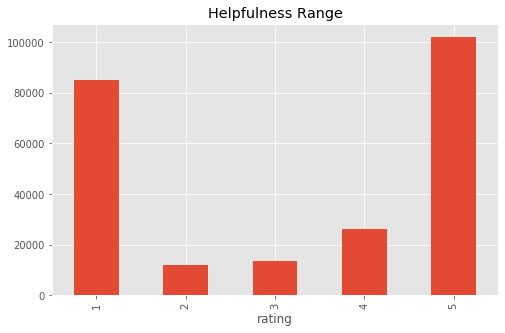

In [5]:
plt.style.use("ggplot")
reviews_df.groupby('rating')['helpfulVotes'].sum().plot(kind='bar',figsize=(8, 5),
                                                 title="Helpfulness Range")

#### Plotting Ratings on x axis and Total Reviews on Y axis for EDA

plt.style.use("ggplot")
items_data.groupby('rating')['totalReviews'].sum().plot(kind='bar',figsize=(8, 5),
                                                 title="Total Reviews")

#### Checking for verified and non verified reviews

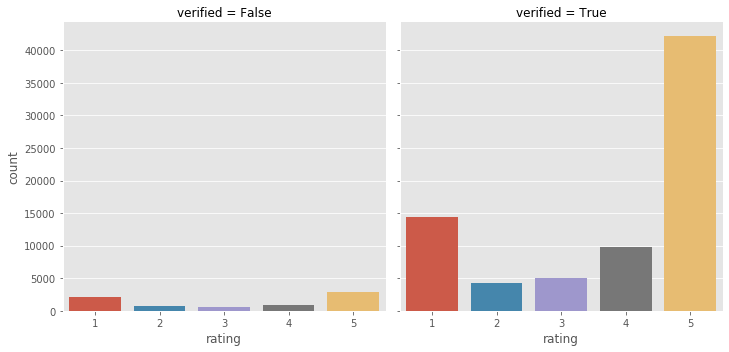

In [6]:
sns.catplot(x="rating",col="verified",data=reviews_df,kind="count");

## LEARNING RATING FROM REVIEW'S TEXT
#### Accuracy of LogisticRegression >> LinearSVM >> Multinomial NB
##### Dropping helpfulVotes column from reviews_df as we are not going to use that column from this stage
##### Removing null values for the sake of vectorization and text processing in further analysis


In [7]:
reviews_df = reviews_df.drop(columns = ['helpfulVotes'])
reviews_df = reviews_df.dropna() # for vectorization
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82780 entries, 0 to 82814
Data columns (total 7 columns):
asin        82780 non-null object
name        82780 non-null object
rating      82780 non-null int64
date        82780 non-null object
verified    82780 non-null bool
title       82780 non-null object
body        82780 non-null object
dtypes: bool(1), int64(1), object(5)
memory usage: 4.5+ MB


##### Seperating ratings and review texts from the dataframe and loading them into lists

In [8]:
texts = reviews_df['body'].tolist()
stars = reviews_df['rating'].tolist()

In [9]:
def balance_classes(xs, ys):
    freqs = Counter(ys)
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

###### Source : https://github.com/Shivananda199/Fake-Product-Review-Monitoring-and-Product-Evaluation-using-Opinion-Mining/blob/master/ita_project/admin/test.py

In [10]:
print(Counter(stars))
balanced_x, balanced_y = balance_classes(texts, stars)
print(Counter(balanced_y))


Counter({5: 44991, 1: 16422, 4: 10708, 3: 5754, 2: 4905})
Counter({3: 4905, 1: 4905, 5: 4905, 4: 4905, 2: 4905})


#### This vectorizer breaks text into single words and bi-grams
#### and then calculates the TF-IDF representation

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
t1 = datetime.datetime.now()

#### the 'fit' builds up the vocabulary from all the reviews
#### while the 'transform' step turns each indivdual text into
#### a matrix of numbers.

In [12]:
vectors = vectorizer.fit_transform(balanced_x)
print(datetime.datetime.now() - t1)

0:00:04.155412


#### Training and Testing the Data 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.33, random_state=42)

# SVM classifier 

###### Support vector machine (SVM) is a learning technique that performs well on sentiment classification. The performance of SVM depends on the used kernel function. Hence, if the suitable kernel is chosen, the efficiency of classification should be improved. There are many approaches to define a new kernel function. Non-negative linear combination of multiple kernels is an alternative, and the performance of sentiment classification can be enhanced when the suitable kernels are combined. In this paper, we analyze and compare various non-negative linear combination kernels. These kernels are applied on product reviews to determine whether a review is positive or negative. The results show that the performance of the combination kernels that outperforms the single kernels.

In [14]:
classifier = LinearSVC()

#### Training the classifier

In [15]:
t1 = datetime.datetime.now()
classifier.fit(X_train, y_train)
print(datetime.datetime.now() - t1)

0:00:01.798363


#### Printing the predicted rating and Actual Ratingsof top 10 rows predicted ratings generated by the model and actual ratings

In [16]:
preds = classifier.predict(X_test)
print("Predicted Ratings: ",list(preds[:10]))
print("Actual Ratings: ",y_test[:10])

Predicted Ratings:  [1, 5, 4, 4, 3, 4, 4, 5, 3, 2]
Actual Ratings:  [2, 2, 4, 4, 3, 5, 4, 4, 3, 3]


#### Printing classification report to find the accuracy. Classification report showing the accuracy, precision, recalland f1-score

In [17]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.58      0.66      0.61      1657
           2       0.43      0.43      0.43      1625
           3       0.43      0.37      0.40      1629
           4       0.49      0.43      0.46      1601
           5       0.65      0.73      0.69      1582

    accuracy                           0.52      8094
   macro avg       0.51      0.52      0.52      8094
weighted avg       0.51      0.52      0.52      8094



##### Here we can see the accuracy of the LinearSVM model as 52%(0.52)from the above output

# Logistic Regression :
###### Logistic Regression to be very effective on text data and the underlying algorithm is also fairly easy to understand. More importantly, in the NLP world, it's generally accepted that Logistic Regression is a great starter algorithm for text related classification


In [18]:
from sklearn.linear_model import LogisticRegression
classifier_2 = LogisticRegression()
t1 = datetime.datetime.now()
classifier_2.fit(X_train, y_train)
print(datetime.datetime.now() - t1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0:00:03.224359


In [19]:
preds_2 = classifier_2.predict(X_test)
print("Predicted Ratings for LogisticRegression: ",list(preds_2[:10]))
print("Actual Ratings: ",y_test[:10])

Predicted Ratings for LogisticRegression:  [1, 5, 4, 4, 4, 5, 5, 1, 3, 3]
Actual Ratings:  [2, 2, 4, 4, 3, 5, 4, 4, 3, 3]


In [20]:
print(classification_report(y_test, preds_2))

              precision    recall  f1-score   support

           1       0.57      0.70      0.63      1657
           2       0.45      0.43      0.44      1625
           3       0.45      0.38      0.42      1629
           4       0.53      0.43      0.48      1601
           5       0.65      0.75      0.70      1582

    accuracy                           0.54      8094
   macro avg       0.53      0.54      0.53      8094
weighted avg       0.53      0.54      0.53      8094



##### Here we can see the accuracy of the LogisticRegression model as 54%(0.54)from the above output

# MultinomialNB : 

###### We achieved significantresults in  text  categorization performance with  the  help  of  MNB  Model. Basically,  we  improved  the  classification  principles to improve the NB performance with standardize categorization  and  management  the  dependence  of  word  occurrence. This change improved the performance of data sets,   as   experimental   results   reveal   according   as   per   numerical background of the datasets.  MNB algorithm is a fast, easy-to-implement, almost modern text categorizationalgorithm.  Proposed method  and  algorithm  offers  many possibilities  for  text  categorizations.  There  are  also  some  changes  that  can  be  made  to  our  classifier  for  greater  accuracy.  It  would  be  carried  out  in  future  and  would  involve use of artificial intelligence to improve the accuracy up to the best extent

###### Source: chrome-extension://gphandlahdpffmccakmbngmbjnjiiahp/https://www.researchgate.net/profile/Anees-Ahmed-5/publication/334451164_Multinomial_Naive_Bayes_Classification_Model_for_Sentiment_Analysis/links/5e227e8d92851cafc38c813c/Multinomial-Naive-Bayes-Classification-Model-for-Sentiment-Analysis.pdf

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier_3 = MultinomialNB()
t1 = datetime.datetime.now()
classifier_3.fit(X_train, y_train)
print(datetime.datetime.now() - t1)

0:00:00.083898


In [22]:
preds_3 = classifier_3.predict(X_test)
print("Predicted Ratings for MultinomialNB: ",list(preds_3[:10]))
print("Actual Ratings: ",y_test[:10])

Predicted Ratings for MultinomialNB:  [1, 5, 4, 4, 4, 5, 5, 2, 3, 2]
Actual Ratings:  [2, 2, 4, 4, 3, 5, 4, 4, 3, 3]


In [23]:
print(classification_report(y_test, preds_3))

              precision    recall  f1-score   support

           1       0.68      0.47      0.55      1657
           2       0.36      0.72      0.48      1625
           3       0.46      0.29      0.36      1629
           4       0.55      0.35      0.43      1601
           5       0.67      0.73      0.70      1582

    accuracy                           0.51      8094
   macro avg       0.55      0.51      0.50      8094
weighted avg       0.55      0.51      0.50      8094



##### Here we can see the accuracy of the MultinomialNB model as 51%(0.51)from the above output

## Remodelling the problem as classification problem 
##### Here we classify the reviews into positive[5*,4*] and negative[2*,1*] reviews.
###### Note: We have excluded 3* ratings for this classification problem to avoid confusion.

In [24]:
keep = set([1,2,4,5])

# calculating the indices for the examples we want to keep
keep_train_is = [i for i, y in enumerate(y_train) if y in keep]
keep_test_is = [i for i, y in enumerate(y_test) if y in keep]

# converting the train set
X_train2 = X_train[keep_train_is, :]
y_train2 = [y_train[i] for i in keep_train_is]
y_train2 = ["n" if (y == 1 or y == 2) else "p" for y in y_train2]

# converting the test set
X_test2 = X_test[keep_test_is, :]
y_test2 = [y_test[i] for i in keep_test_is]
y_test2 = ["n" if (y == 1 or y == 2) else "p" for y in y_test2]

##### Accuracy for the remodelled problem

In [25]:
classifier.fit(X_train2, y_train2)
preds = classifier.predict(X_test2)
print(classification_report(y_test2, preds))
print(confusion_matrix(y_test2, preds))

              precision    recall  f1-score   support

           n       0.89      0.93      0.91      3282
           p       0.92      0.88      0.90      3183

    accuracy                           0.90      6465
   macro avg       0.90      0.90      0.90      6465
weighted avg       0.90      0.90      0.90      6465

[[3042  240]
 [ 393 2790]]


##### By doing this, the accuracy increased to 90%

# Topic Modelling 

##### Define word frequency function

In [26]:
def word_freq_dict(text):
    wordList = text.split()
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict


##### Source: https://www.kaggle.com/yaowenling/amazon-cell-phone-review-nlp

##### Create brand subsets 
##### Seperating reviews based on brand

In [27]:
reviews = pd.merge(reviews_df, items_data, how="left", left_on="asin", right_on="asin")
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))
reviews.head()


apple = reviews[reviews["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
samsung = reviews[reviews["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)
xiaomi = reviews[reviews["brand"]=="Xiaomi"].sort_values(by=["date"], ascending=False)

##### Initialize TF-IDF vectorizer
##### Initalize LDA model

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, stop_words="english")
n_topics=10
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

##### Define a function to print LDA topics

In [29]:
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()

##### Run LDA model for Apple

In [30]:
t0 = time.time()
apple_tfidf = tfidf_vectorizer.fit_transform(apple["body"])
apple_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(apple_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Apple.".format(n_topics))
print_topn_words(lda, apple_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Apple.
Topic #0: phone came got charger scratches iphone just time apple new
Topic #1: love working time phone new far iphone bought scratches great
Topic #2: good use bought phone iphone far time scratches price just
Topic #3: work product buy phone iphone time new great bought good
Topic #4: new brand looks price phone like works great good came
Topic #5: great works far phone scratches new good came iphone time
Topic #6: screen just phone iphone scratches got new came buy time
Topic #7: condition perfect came works phone scratches new great iphone good
Topic #8: like apple refurbished phone new iphone scratches buy time got
Topic #9: battery iphone life phone new good screen great scratches like

Done in 43.512s.


##### Run LDA model for Samsung

In [31]:
t0 = time.time()
samsung_tfidf = tfidf_vectorizer.fit_transform(samsung["body"])
samsung_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(samsung_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Samsung.".format(n_topics))
print_topn_words(lda, samsung_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Samsung.
Topic #0: good unlocked condition phone just came great far new price
Topic #1: works great don phone new just like came condition good
Topic #2: love battery phone life camera great just use new good
Topic #3: use phone buy samsung used did bought don just like
Topic #4: phone great price far just new good camera use condition
Topic #5: work got does phone just did don new use great
Topic #6: note phones phone galaxy samsung new screen just battery like
Topic #7: screen phone fast really just like battery great good use
Topic #8: product time came bought phone new just great samsung good
Topic #9: new like sim card phone just came did great far

Done in 162.357s.


##### Run LDA model for Xiaomi

In [34]:
t0 = time.time()
xiaomi_tfidf = tfidf_vectorizer.fit_transform(xiaomi["body"])
xiaomi_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(xiaomi_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Xiaomi.".format(n_topics))
print_topn_words(lda, xiaomi_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Xiaomi.
Topic #0: excelente la el android muy ve xiaomi mobile screen amazing
Topic #1: good battery phone price life amazing great screen camera fast
Topic #2: muy el xiaomi ve android la excelente mobile love phone
Topic #3: nice phone really works good price great doesn camera like
Topic #4: better quality phone price works camera work good android xiaomi
Topic #5: phone best phones android ve apps screen camera battery like
Topic #6: far like just phone good price great screen bought fast
Topic #7: phone great money xiaomi time work use buy mobile bought
Topic #8: don like camera really doesn screen use battery phone time
Topic #9: love excellent phone camera fast great price buy screen quality

Done in 13.031s.


##### Plot feature importance using XGBoost

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


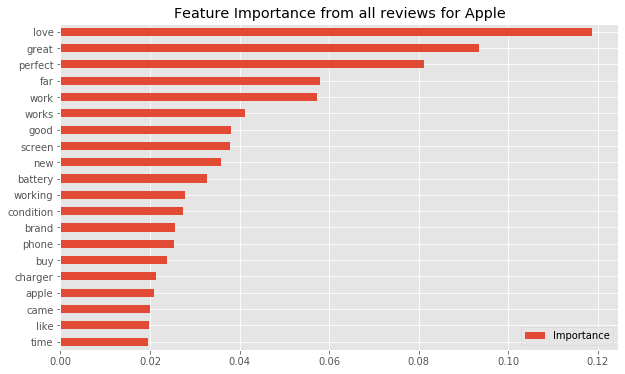

In [36]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(apple_tfidf, apple["positivity"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=apple_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(20).plot(kind="barh", figsize=(10, 6))
plt.title("Feature Importance from all reviews for Apple")
plt.show()

In [35]:
!pip install xgboost

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


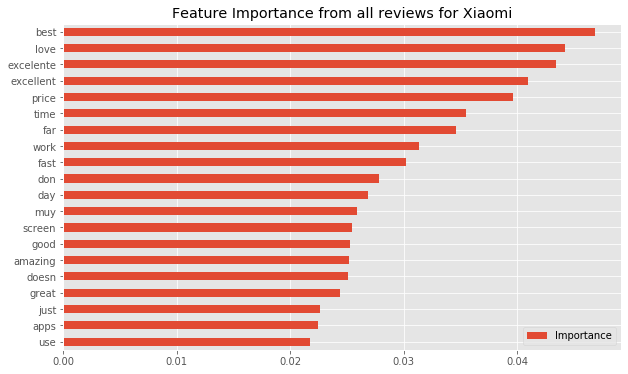

In [37]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(xiaomi_tfidf, xiaomi["positivity"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=xiaomi_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(20).plot(kind="barh", figsize=(10, 6))
plt.title("Feature Importance from all reviews for Xiaomi")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


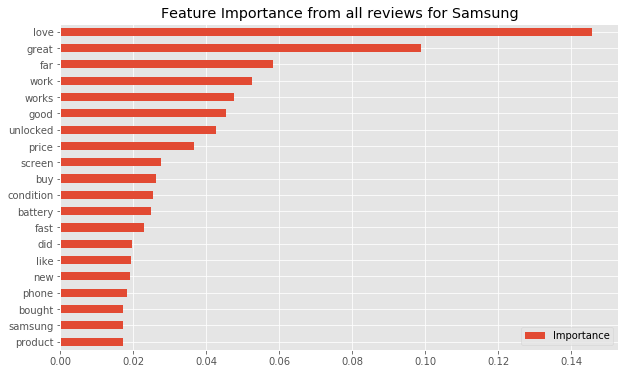

In [38]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(samsung_tfidf, samsung["positivity"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=samsung_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(20).plot(kind="barh", figsize=(10, 6))
plt.title("Feature Importance from all reviews for Samsung")
plt.show()